/home/labhhc3/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 28.
  warnings.warn(
/home/labhhc3/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 28.
  warnings.warn(
/home/labhhc3/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 28.
  warnings.warn(
/home/labhhc3/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 28.
  warnings.warn(
/home/labhhc3/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear

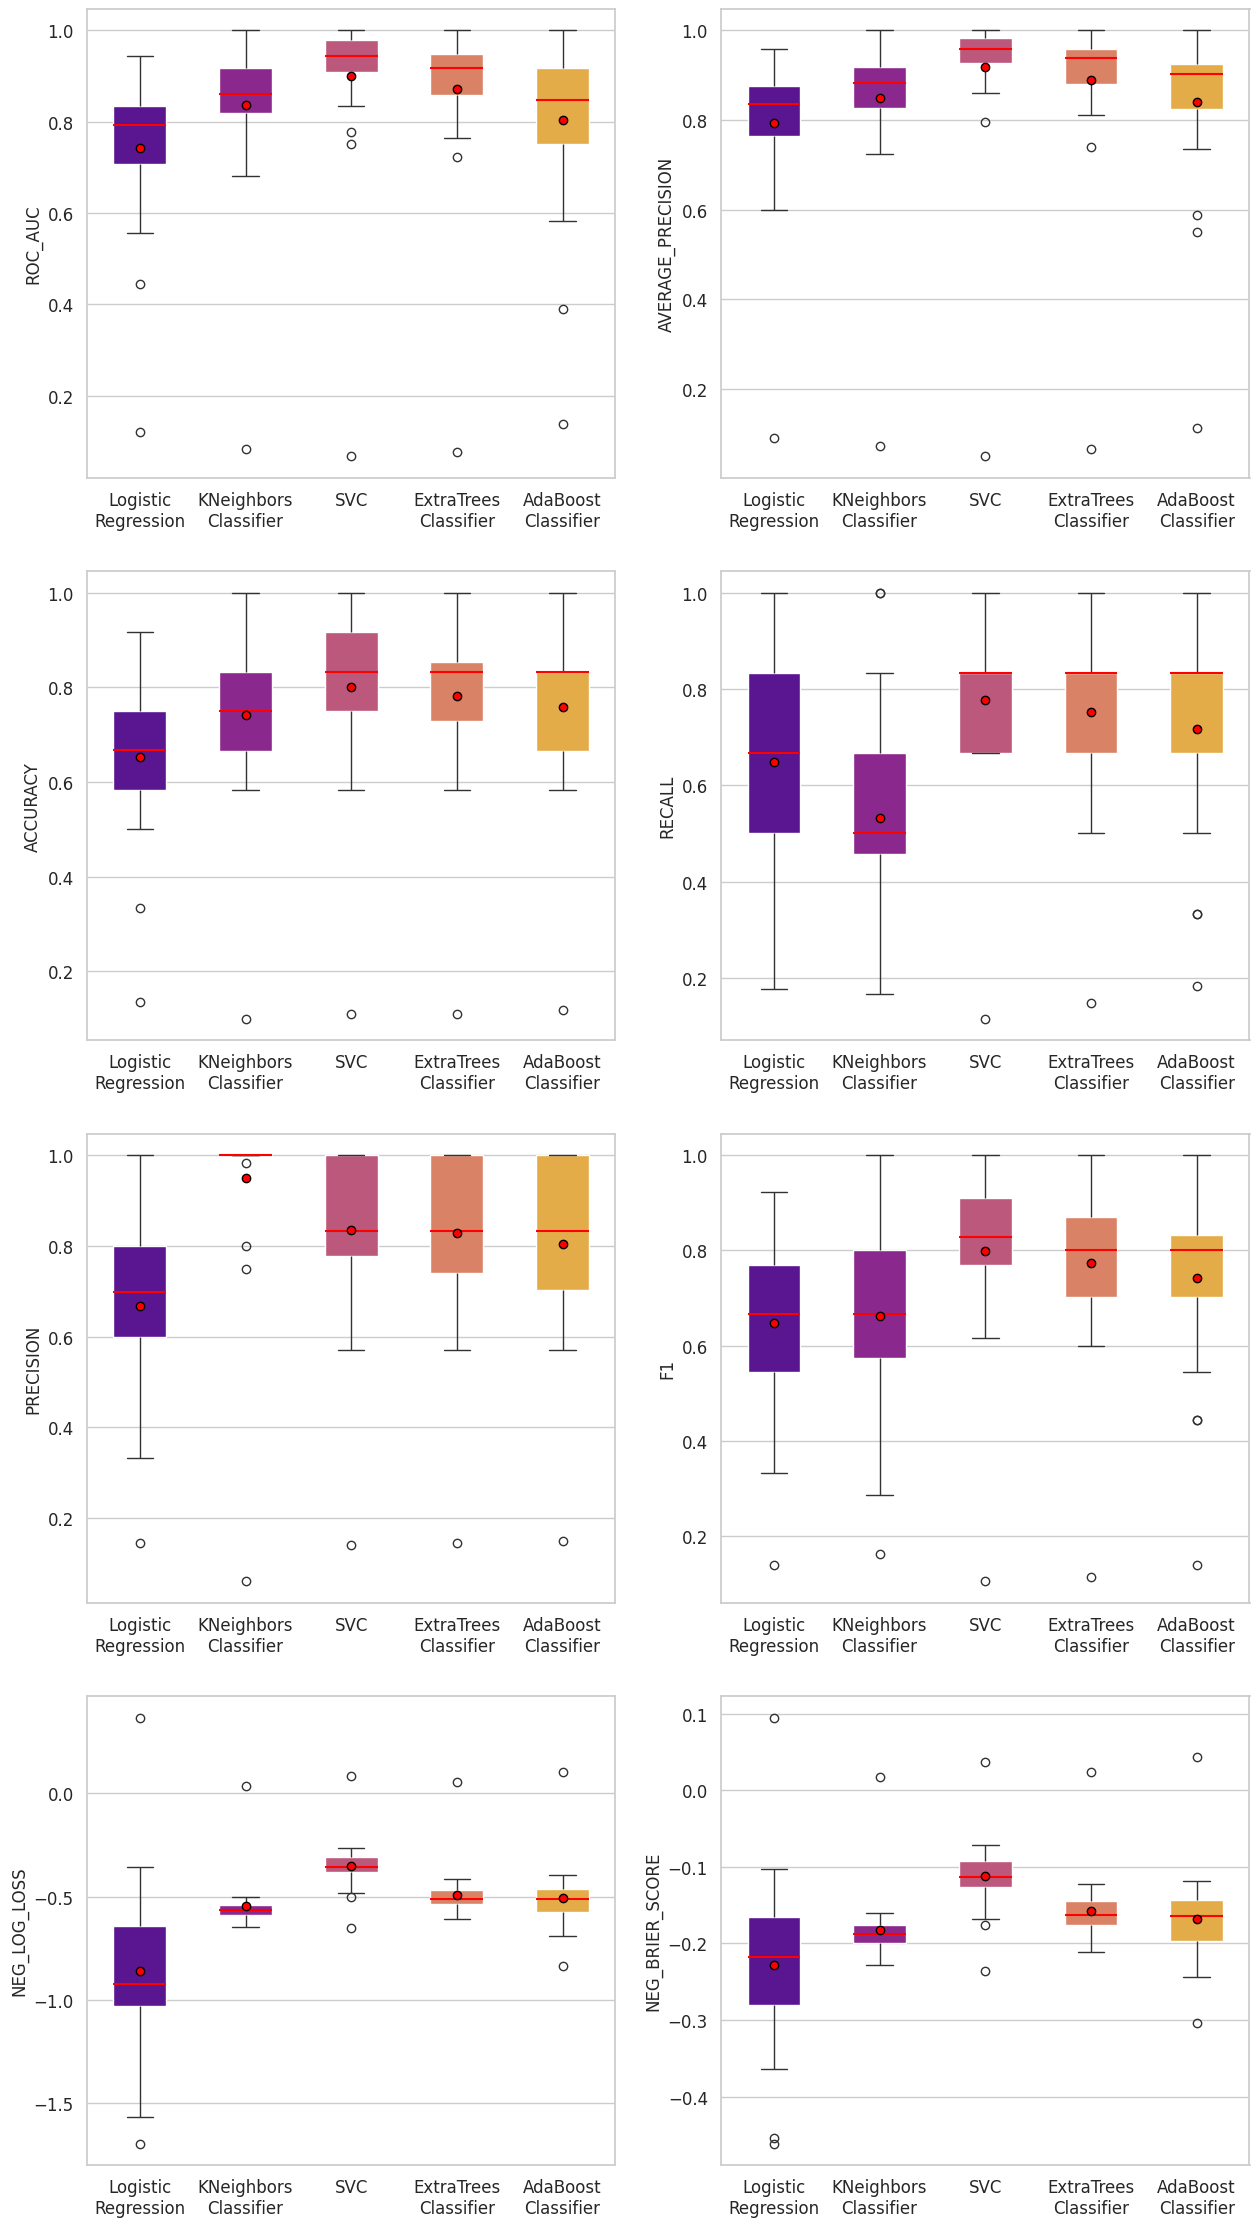

LogisticRegression  KNeighborsClassifier    SVC  \
scoring  cv_cycle                                                    
accuracy 1                      0.500                   NaN    NaN   
         1                        NaN              0.666667    NaN   
         1                        NaN                   NaN  0.750   
         1                        NaN                   NaN    NaN   
         1                        NaN                   NaN    NaN   
...                               ...                   ...    ...   
roc_auc  std                    0.121                   NaN    NaN   
         std                      NaN              0.083000    NaN   
         std                      NaN                   NaN  0.067   
         std                      NaN                   NaN    NaN   
         std                      NaN                   NaN    NaN   

                   ExtraTreesClassifier  AdaBoostClassifier  
scoring  cv_cycle                                            
accuracy 1                          NaN                 NaN  
         1                          NaN                 NaN  
         1                          NaN                 NaN  
         1                     0.666667                 NaN  
         1                          NaN            0.583333  
...                                 ...                 ...  
roc_auc  std                        NaN                 NaN  
         std                        NaN                 NaN  
         std                        NaN                 NaN  
         std                   0.077000                 NaN  
         std                        NaN            0.138000  

[1120 rows x 5 columns]

In [1]:
import os
import unittest
import numpy as np
import pandas as pd
import matplotlib
import warnings
from sklearn.datasets import make_classification, make_regression
from ProQSAR.ModelDeveloper.model_validation import cross_validation_report
warnings.filterwarnings("ignore", category=FutureWarning)

def create_classification_data(
    n_samples=60, n_features=25, n_informative=10, random_state=42
) -> pd.DataFrame:
    """
    Generate a DataFrame containing synthetic classification data.

    Args:
        n_samples (int): The number of samples.
        n_features (int): The number of features.
        n_informative (int): The number of informative features.
        random_state (int): Seed for random number generation.

    Returns:
        pd.DataFrame: DataFrame with features, ID, and activity columns.
    """
    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=n_informative,
        random_state=random_state,
    )
    data = pd.DataFrame(X, columns=[f"Feature{i}" for i in range(1, n_features + 1)])
    data["ID"] = np.arange(n_samples)
    data["Activity"] = y
    return data


scoring_list = [
            "roc_auc",
            "average_precision",
            "accuracy",
            "recall",
            "precision",
            "f1",
            "neg_log_loss",
            "neg_brier_score",
        ]
select_model = ["LogisticRegression", "KNeighborsClassifier", "SVC", "ExtraTreesClassifier", "AdaBoostClassifier"]

class_data = create_classification_data()
cv_result = cross_validation_report(
    class_data, 
    activity_col="Activity", 
    id_col="ID", 
    n_splits=5, 
    n_repeats=5,
    scoring_list=scoring_list,
    select_model=select_model,
    visualize="box",
    save_csv=True)

from IPython.display import display
display(cv_result)
